/tmp/ipykernel_7238/3126642635.py:25: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = subset.pivot_table(
/tmp/ipykernel_7238/3126642635.py:25: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = subset.pivot_table(
/tmp/ipykernel_7238/3126642635.py:25: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = subset.pivot_table(
/tmp/ipykernel_7238/3126642635.py:25: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Speci

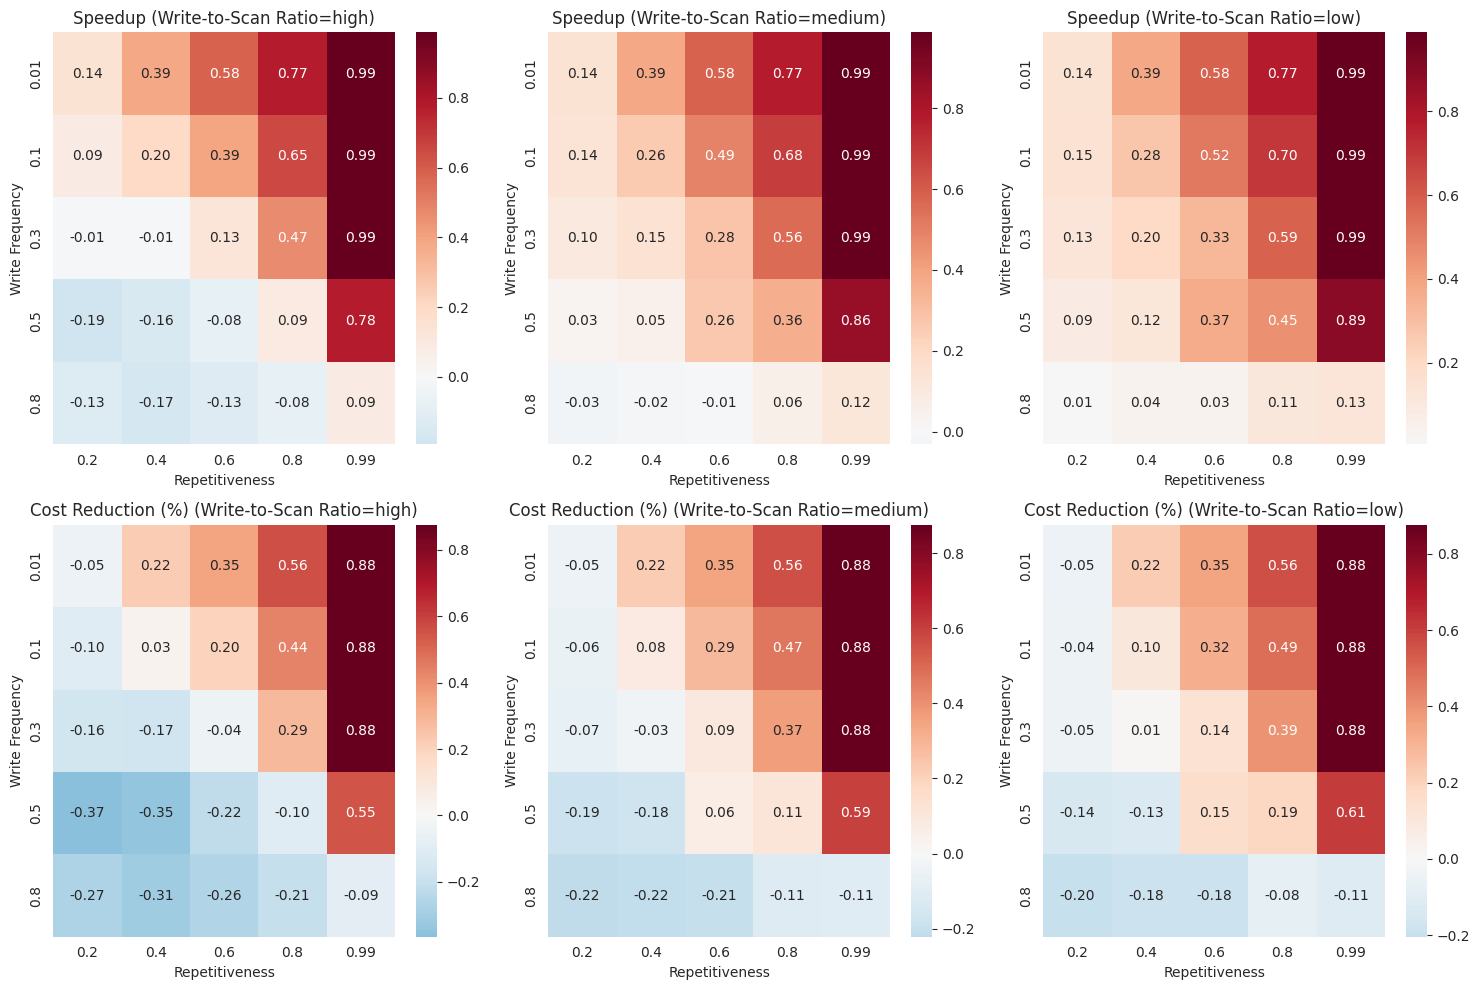

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("results/redset_scan_3.csv")

df['write_frequency'] = pd.Categorical(df['write_frequency'], ordered=True)
df['repetitiveness'] = pd.Categorical(df['repetitiveness'], ordered=True)

ratio_categories = df['ratio_cat'].unique()

fig, axes = plt.subplots(nrows=2, ncols=len(ratio_categories), figsize=(5 * len(ratio_categories), 10))

metrics = ['speedup', 'cost_reduction']
titles = ['Speedup', 'Cost Reduction (%)']

for row, metric in enumerate(metrics):
    for col, scan in enumerate(ratio_categories):
        subset = df[df['ratio_cat'] == scan]
        pivot = subset.pivot_table(
            index='write_frequency',
            columns='repetitiveness',
            values=metric,
            aggfunc='mean'
        )

        sns.heatmap(
            pivot,
            annot=True, fmt=".2f",
            cmap="RdBu_r",
            center=0,
            ax=axes[row, col]
        )
        axes[row, col].set_title(f"{titles[row]} (Write-to-Scan Ratio={scan})")
        axes[row, col].set_xlabel("Repetitiveness")
        axes[row, col].set_ylabel("Write Frequency")

plt.tight_layout()
plt.show()
